Initial Visualisations and statistical tests
for getting a feel for the data and how it could be modelled

In [3]:
#getting libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import probplot, levene, ttest_ind


In [4]:
#loading dataframe
df = pd.read_parquet("../datasets/processed.parquet")

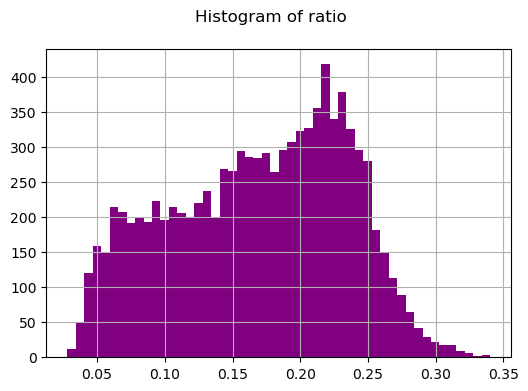

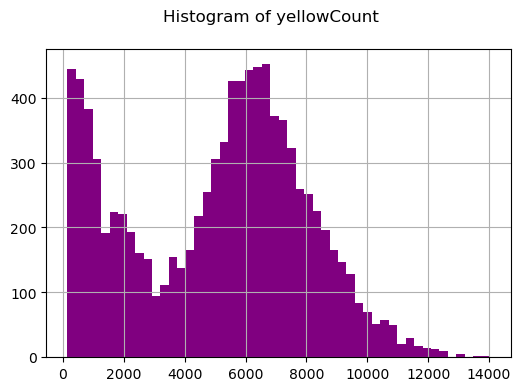

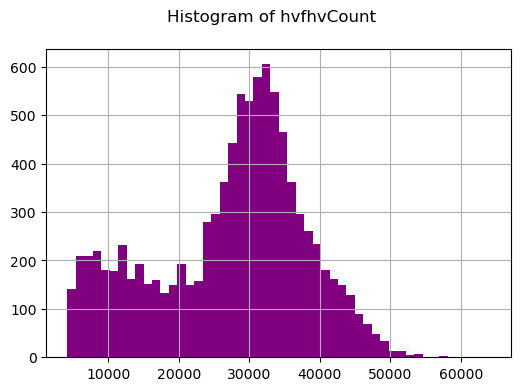

In [ ]:
#Histograms of the numeric values to get a sense of distribution
for col in ["ratio", "yellowCount", "hvfhvCount"]:
    df[col].hist(bins=50, figsize=(6,4), color = 'purple')
    plt.suptitle(f"Histogram of {col}")
    plt.show()

testing assumptions needed for initial statistical tests

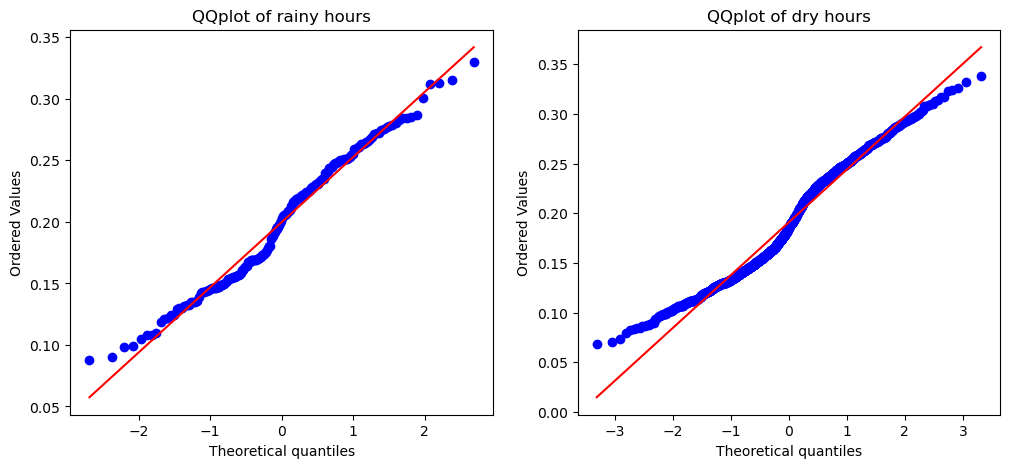

0.5723691441068721
0.03374091623541084


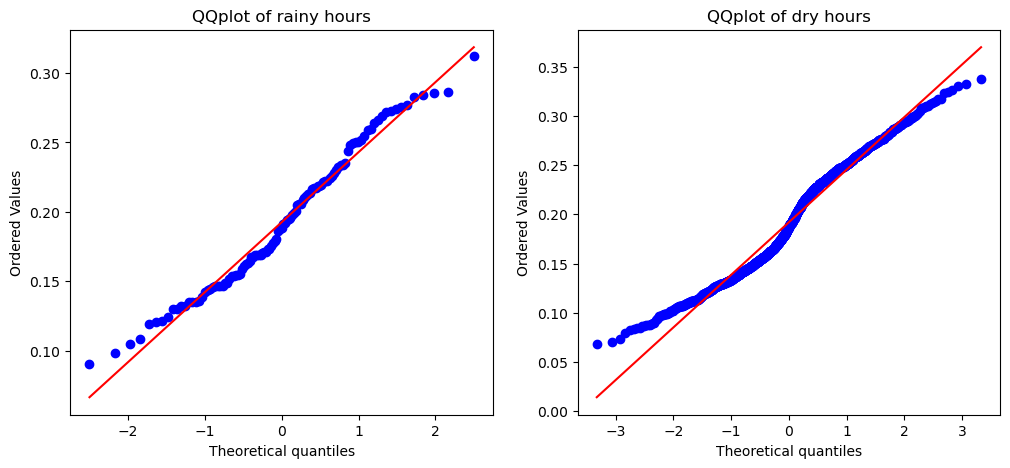

0.07163788872386306
0.9152356205186909


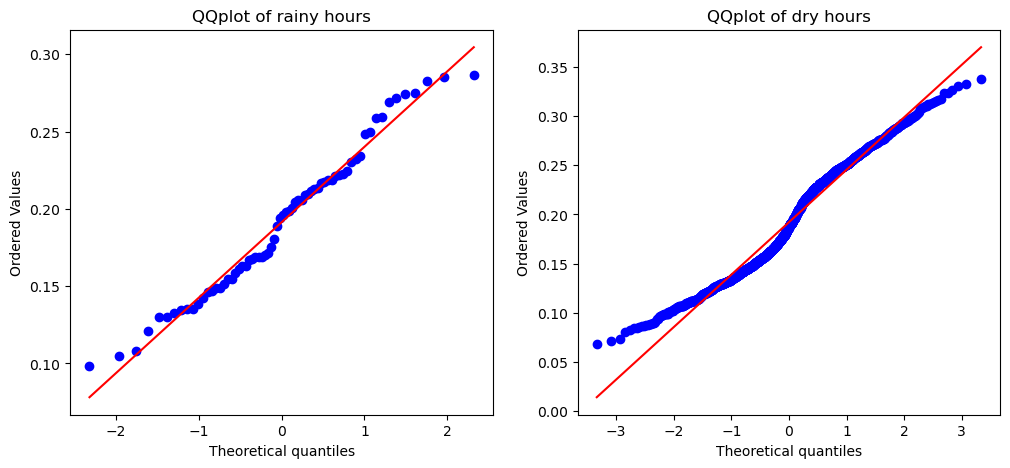

0.0505878689919512
0.9079179662278076


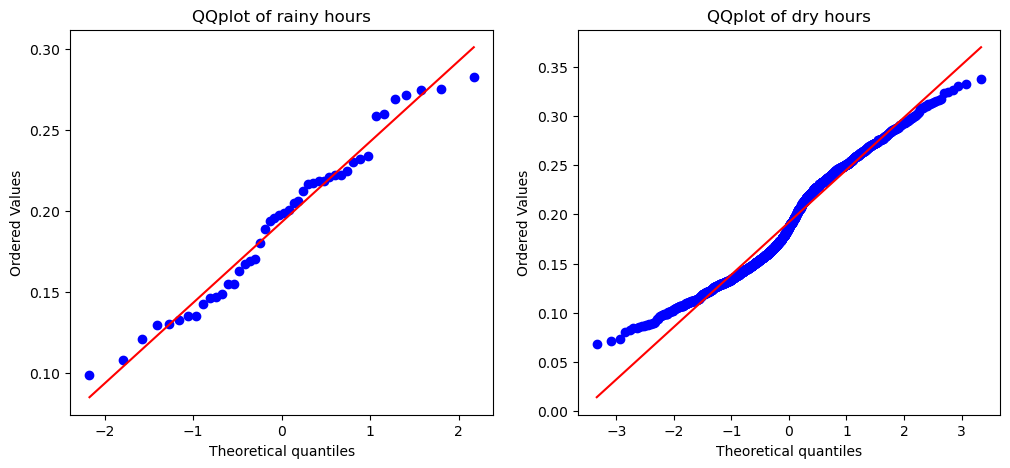

0.11070559661373726
0.8856000389249391


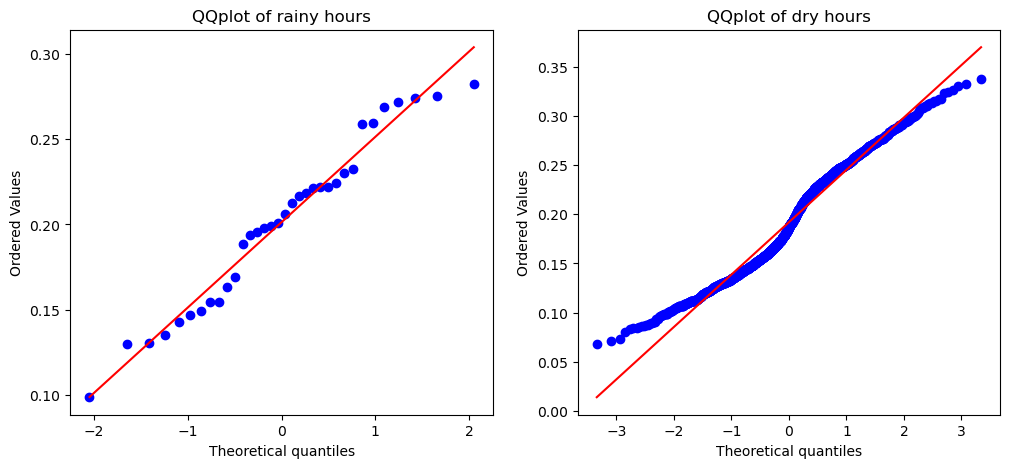

0.1271945057750801
0.2720755521186823


In [5]:
#seperate rush hour yes/no, remove #
rush = df[df["rushhour"] == 1]

#testing a variety of thresholds
for i in [0.1, 0.5, 1, 1.5, 2]:

    #seperating out the presence of rainfall above nelligible amounts
    rainyRatio = rush[rush["rain"] > i]["ratio"]
    dryRatio   = rush[rush["rain"] <= i]["ratio"]

    #using qqplots as shapiro-wilk is sensitive to large sample size
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    probplot(rainyRatio, dist="norm", plot=plt)
    plt.title("QQplot of rainy hours")

    plt.subplot(1,2,2)
    probplot(dryRatio, dist="norm", plot=plt)
    plt.title("QQplot of dry hours")
    plt.show()

    #check equal variances
    stat, p = levene(rainyRatio, dryRatio)
    print(p)
    
    #t test
    stat, t = ttest_ind(rainyRatio, dryRatio, equal_var=False)
    print(t)


Visualisations

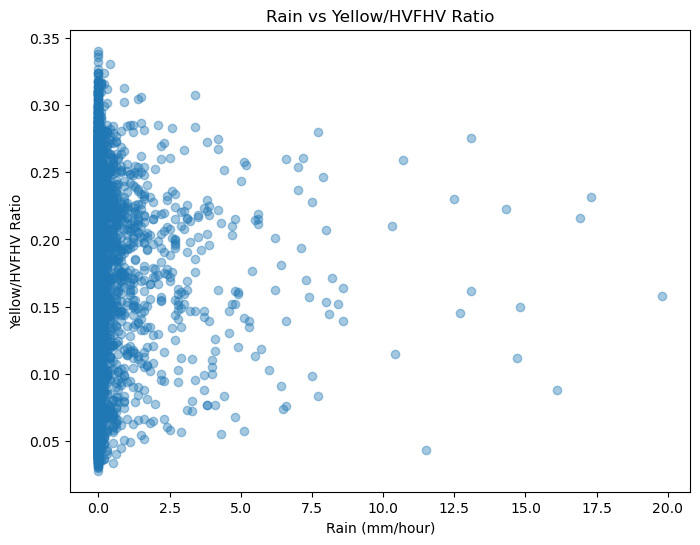

In [ ]:
#scatterplot ratio vs rain

plt.figure(figsize=(8,6))
plt.scatter(rush["rain"], rush["ratio"], alpha=0.4)
plt.title("Rain vs Yellow/HVFHV Ratio")
plt.xlabel("Rain (mm/hour)")
plt.ylabel("Yellow/HVFHV Ratio")
plt.show()

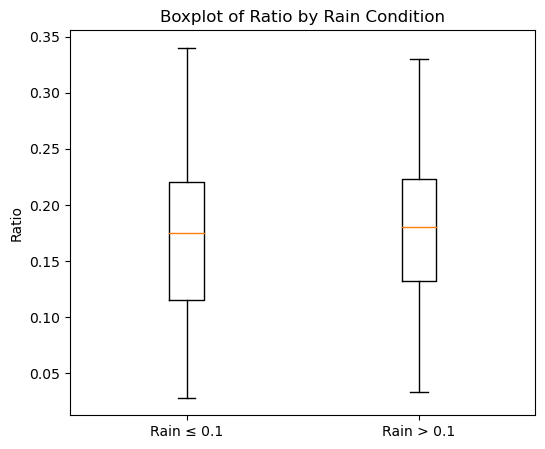

In [ ]:
#looking at boxplots
plt.figure(figsize=(6,5))
#for easy chaging
a= 0.1
rainyRatio = rush[rush["rain"] > a]["ratio"]
dryRatio  = rush[rush["rain"] <= a]["ratio"]
plt.boxplot([dryRatio, rainyRatio], labels=['Rain ≤ 0.1', 'Rain > 0.1'])
plt.ylabel("Ratio")
plt.title("Boxplot of Ratio by Rain Condition")
plt.show()

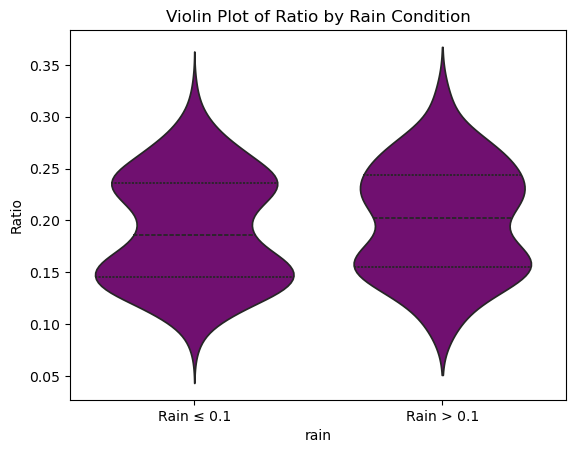

In [6]:
#violin plots to see distribution of ratio in wet vs dru conditions
sns.violinplot(x=(rush["rain"] > 0.1), y="ratio", data=rush, inner="quartile", color = "purple")
plt.xticks([0, 1], ["Rain ≤ 0.1", "Rain > 0.1"])
plt.ylabel("Ratio")
plt.title("Violin Plot of Ratio by Rain Condition")
plt.show()